Imports

In [1]:
import numpy as np
import umap
from matplotlib import pyplot as plt

from load_data import load_fashion_mnist, load_clothing
from utils import one_hot_encode, FASHION_MNIST_LABELS, load_model

Load data and models

In [2]:
x_train, y_train, x_test, y_test = load_fashion_mnist()
y_train_one_hot = one_hot_encode(y_train, 10)
y_test_one_hot = one_hot_encode(y_test, 10)

x_train_c = x_train.reshape(-1, 1, 28, 28)
x_test_c = x_test.reshape(-1, 1, 28, 28)

autoencoder1 = load_model('autoencoder_conv_good.pkl')  # 3x3 kernel , 2x 4 filters
autoencoder2 = load_model('autoencoder_conv_good2.pkl')  # 3x3 kernel , 2x 8 filters
autoencoder3 = load_model('autoencoder_conv_good3.pkl')  # 3x3 kernel , 2x 16 filters
autoencoder4 = load_model('autoencoder_conv_good4.pkl')  # 5x5 kernel , 2x 4 filters

Learning curves for autoencoders

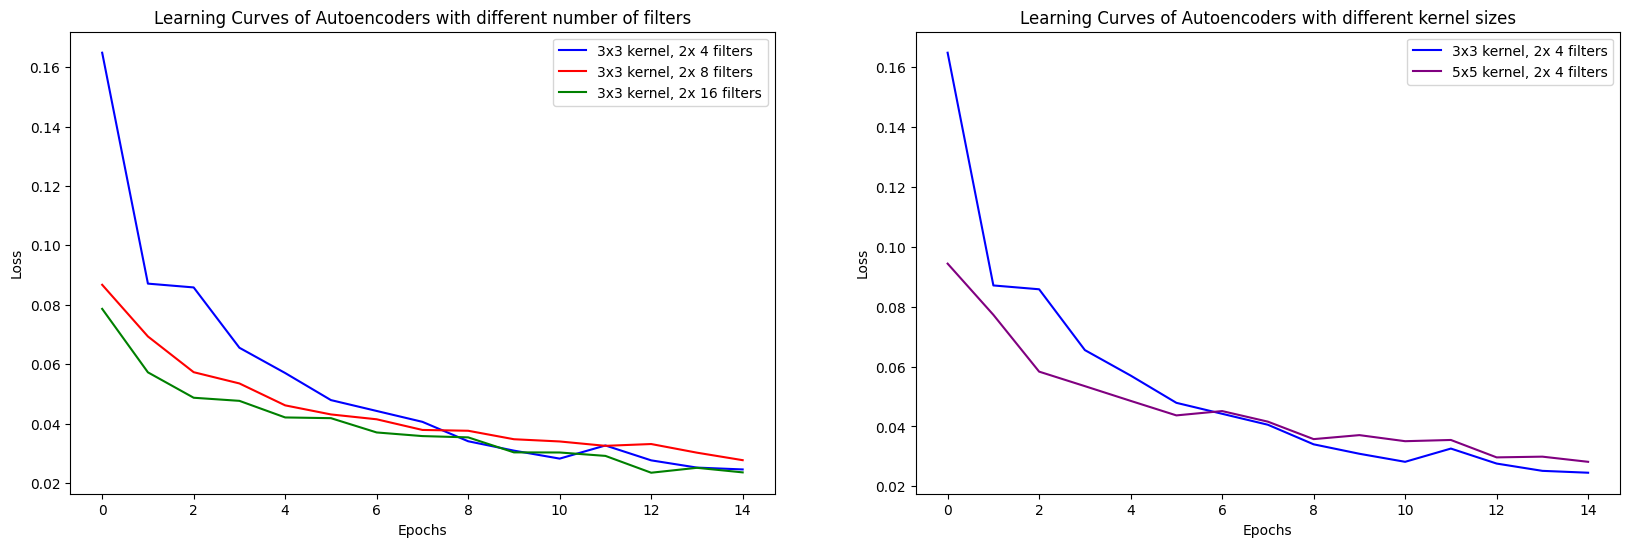

In [3]:
losses1 = autoencoder1.losses
losses2 = autoencoder2.losses
losses3 = autoencoder3.losses
losses4 = autoencoder4.losses

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.plot(losses1, label='3x3 kernel, 2x 4 filters', color='blue')
plt.plot(losses2, label='3x3 kernel, 2x 8 filters', color='red')
plt.plot(losses3, label='3x3 kernel, 2x 16 filters', color='green')
plt.title('Learning Curves of Autoencoders with different number of filters')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(losses1, label='3x3 kernel, 2x 4 filters', color='blue')
plt.plot(losses4, label='5x5 kernel, 2x 4 filters', color='purple')
plt.title('Learning Curves of Autoencoders with different kernel sizes')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Filters

Filters of Layer 1:


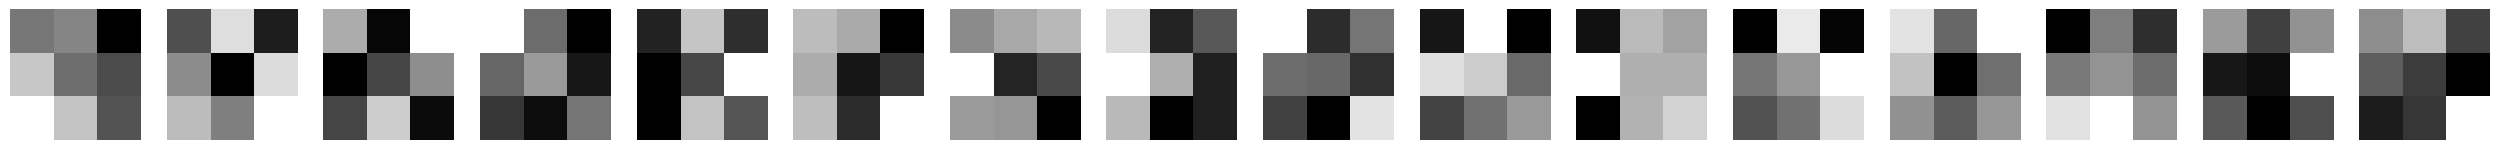

Filters of Layer 2:


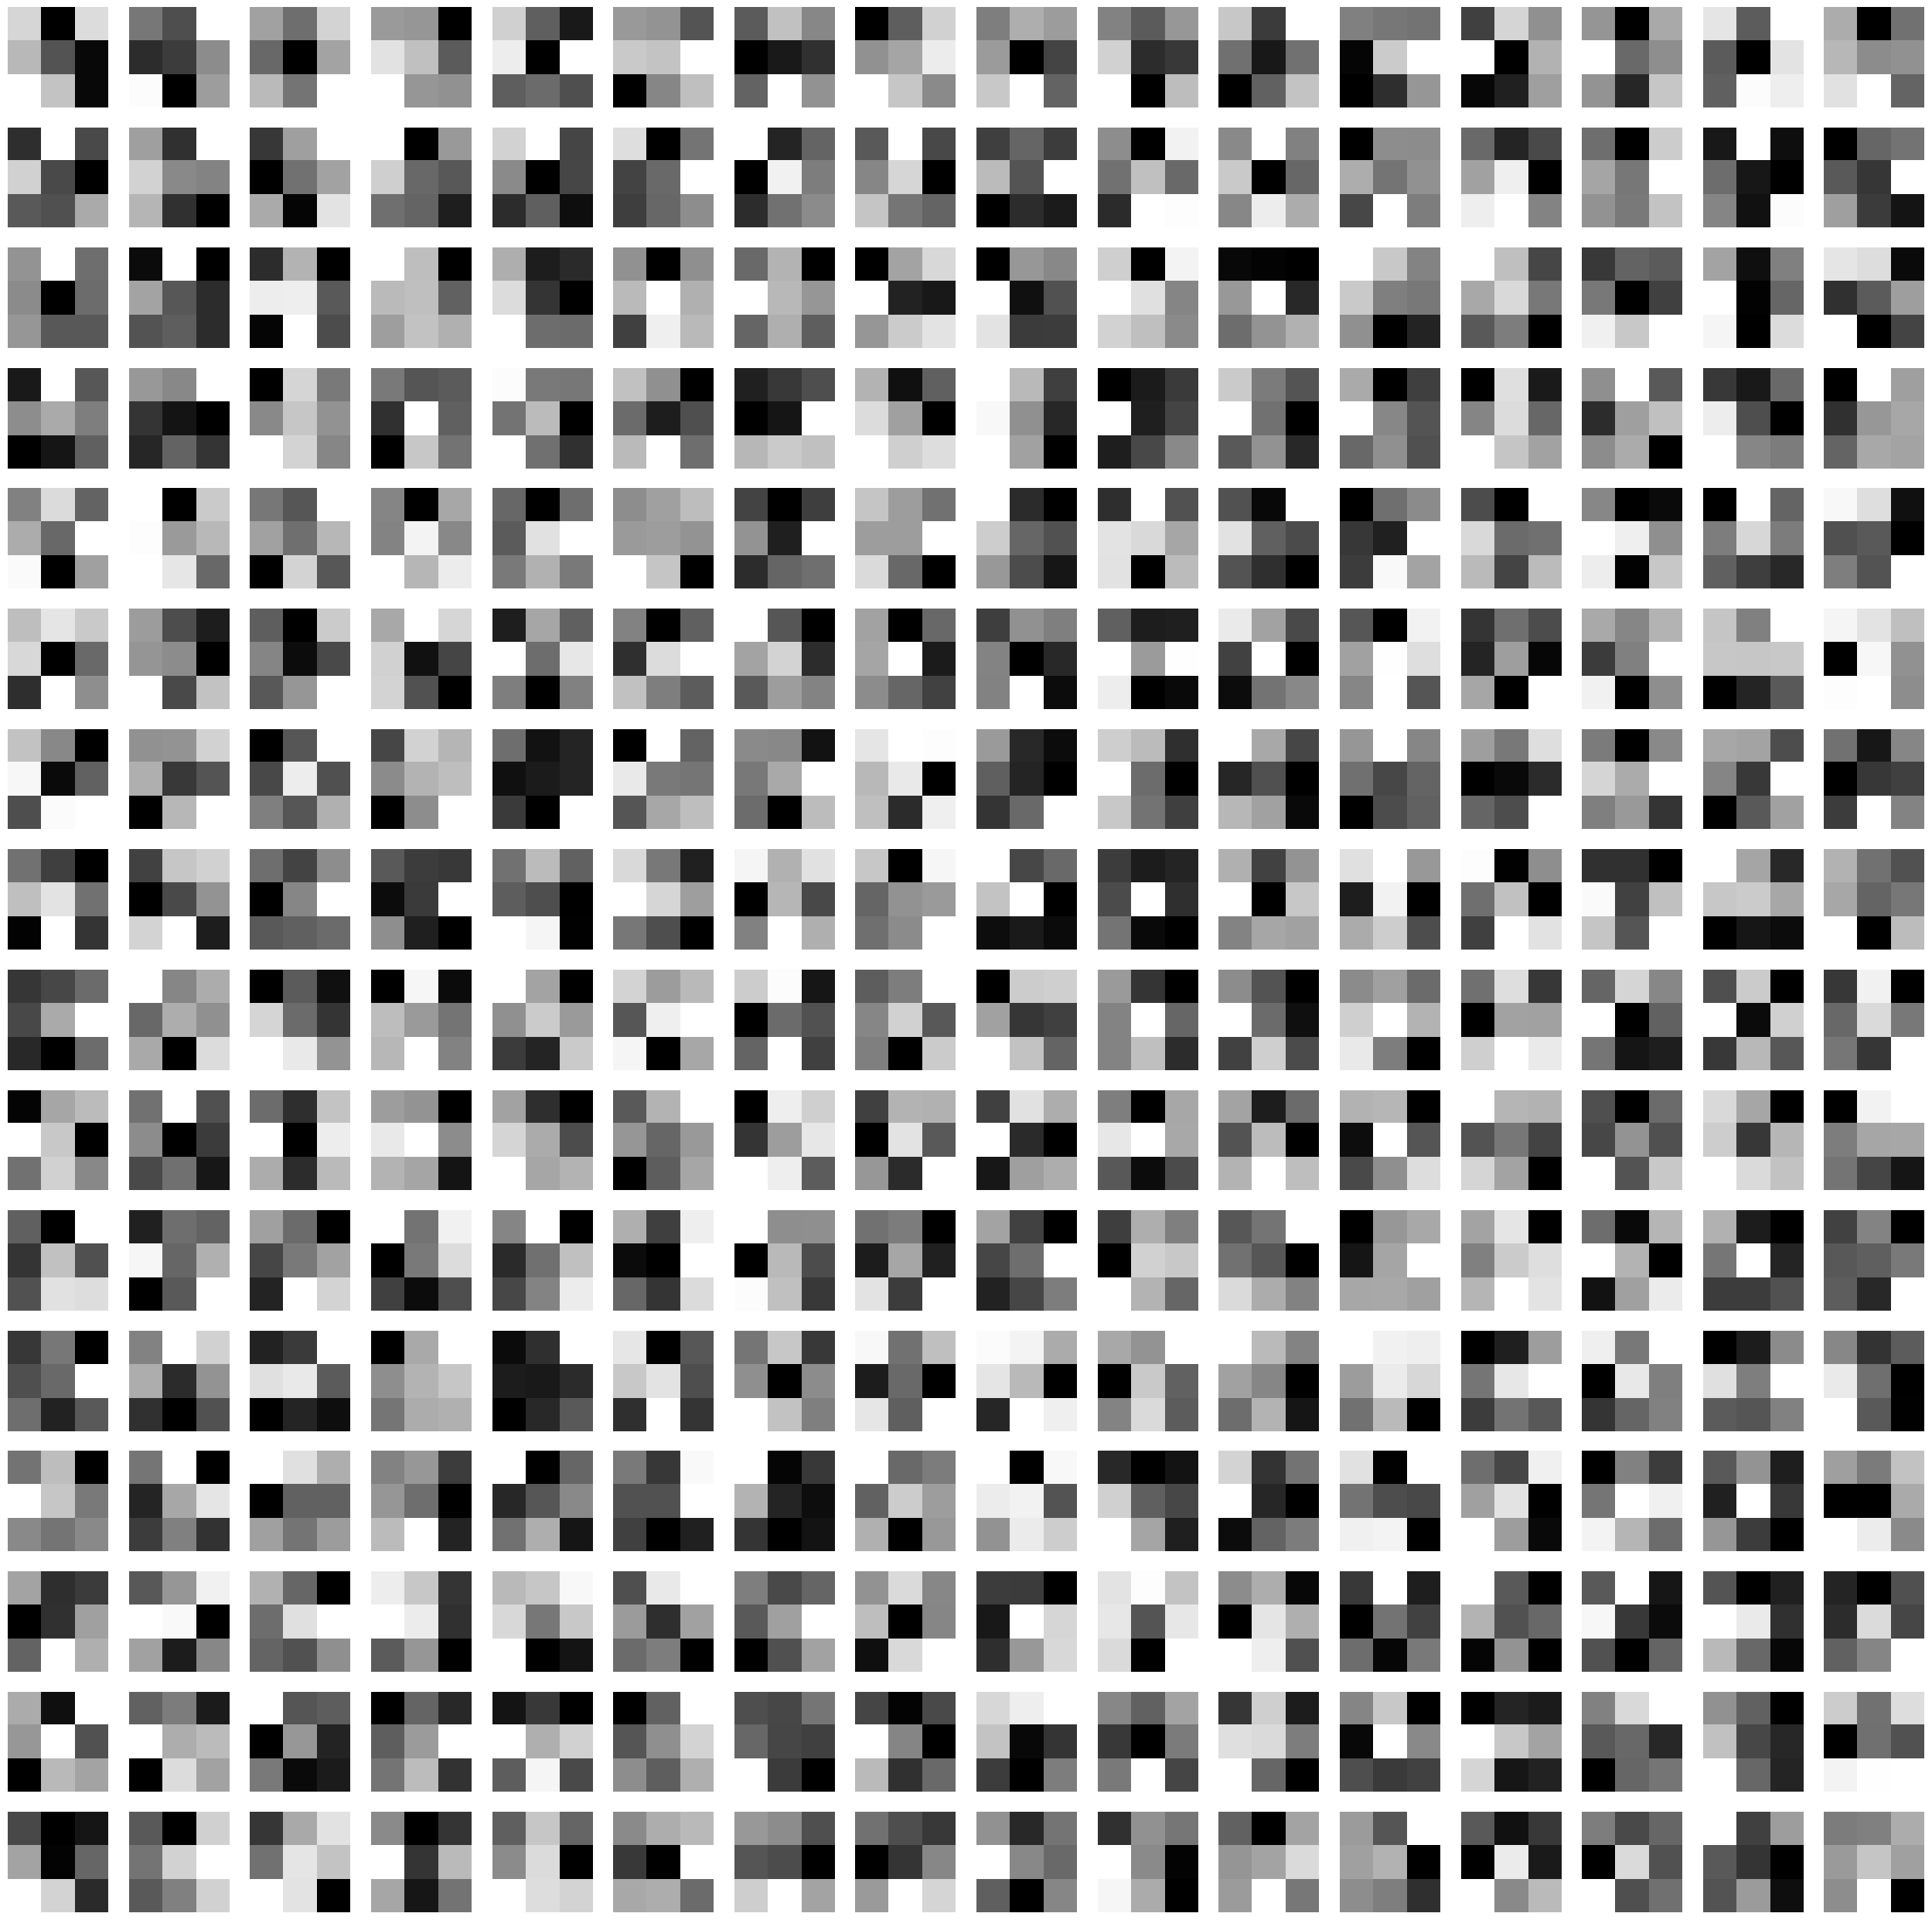

In [4]:
def display_filters(filters):
    n_filters, n_channels, _, _ = filters.shape

    plt.figure(figsize=(n_filters * 2, n_channels * 2), facecolor='white')

    row = 1
    for n in range(n_filters):
        for c in range(n_channels):
            plt.subplot(n_channels, n_filters, row)
            row += 1
            fltr = filters[n, c, :, :]
            plt.imshow(fltr, cmap='gray')
            plt.axis('off')

    plt.show()

print('Filters of Layer 1:')
display_filters(autoencoder3.layers[0].weights)
print('Filters of Layer 2:')
display_filters(autoencoder3.layers[2].weights)

Feature maps

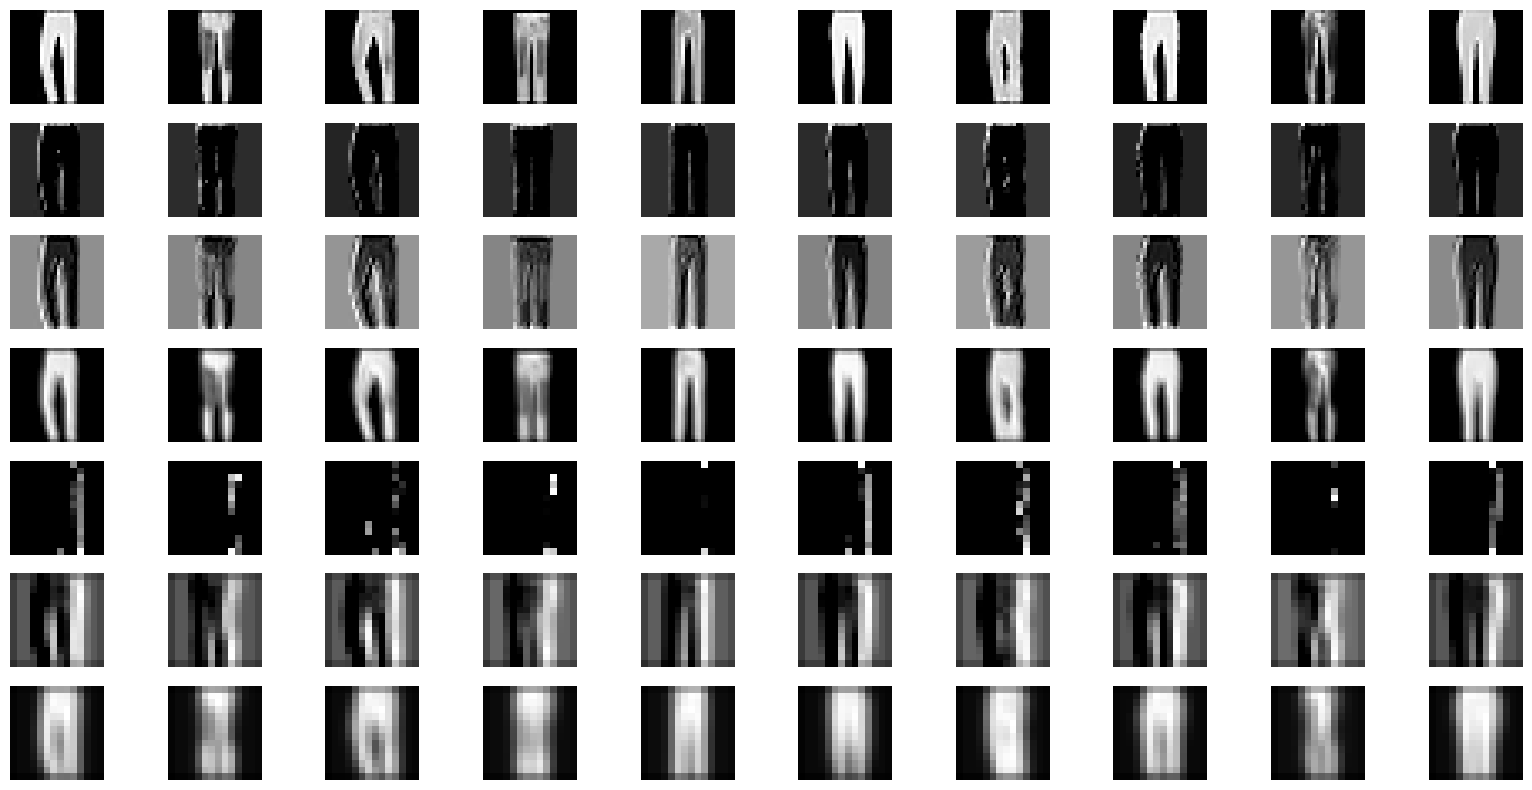

In [12]:
_, _, trouser_x_test, _ = load_clothing(1)

plt.figure(figsize=(20, 10))

for i in range(10):
    plt.subplot(7, 10, i + 1)
    plt.imshow(trouser_x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    output = autoencoder3.forward(trouser_x_test[i].reshape(-1, 1, 28, 28))

    plt.subplot(7, 10, i + 11)
    plt.imshow(autoencoder3.layers[0].outputs[0][1], cmap='gray')
    plt.axis('off')

    plt.subplot(7, 10, i + 21)
    plt.imshow(autoencoder3.layers[0].outputs[0][2], cmap='gray')
    plt.axis('off')

    plt.subplot(7, 10, i + 31)
    plt.imshow(autoencoder3.layers[0].outputs[0][3], cmap='gray')
    plt.axis('off')
    
    plt.subplot(7, 10, i + 41)
    plt.imshow(autoencoder3.layers[2].outputs[0][1], cmap='gray')
    plt.axis('off')

    plt.subplot(7, 10, i + 51)
    plt.imshow(autoencoder3.layers[2].outputs[0][2], cmap='gray')
    plt.axis('off')

    plt.subplot(7, 10, i + 61)
    plt.imshow(autoencoder3.layers[2].outputs[0][3], cmap='gray')
    plt.axis('off')

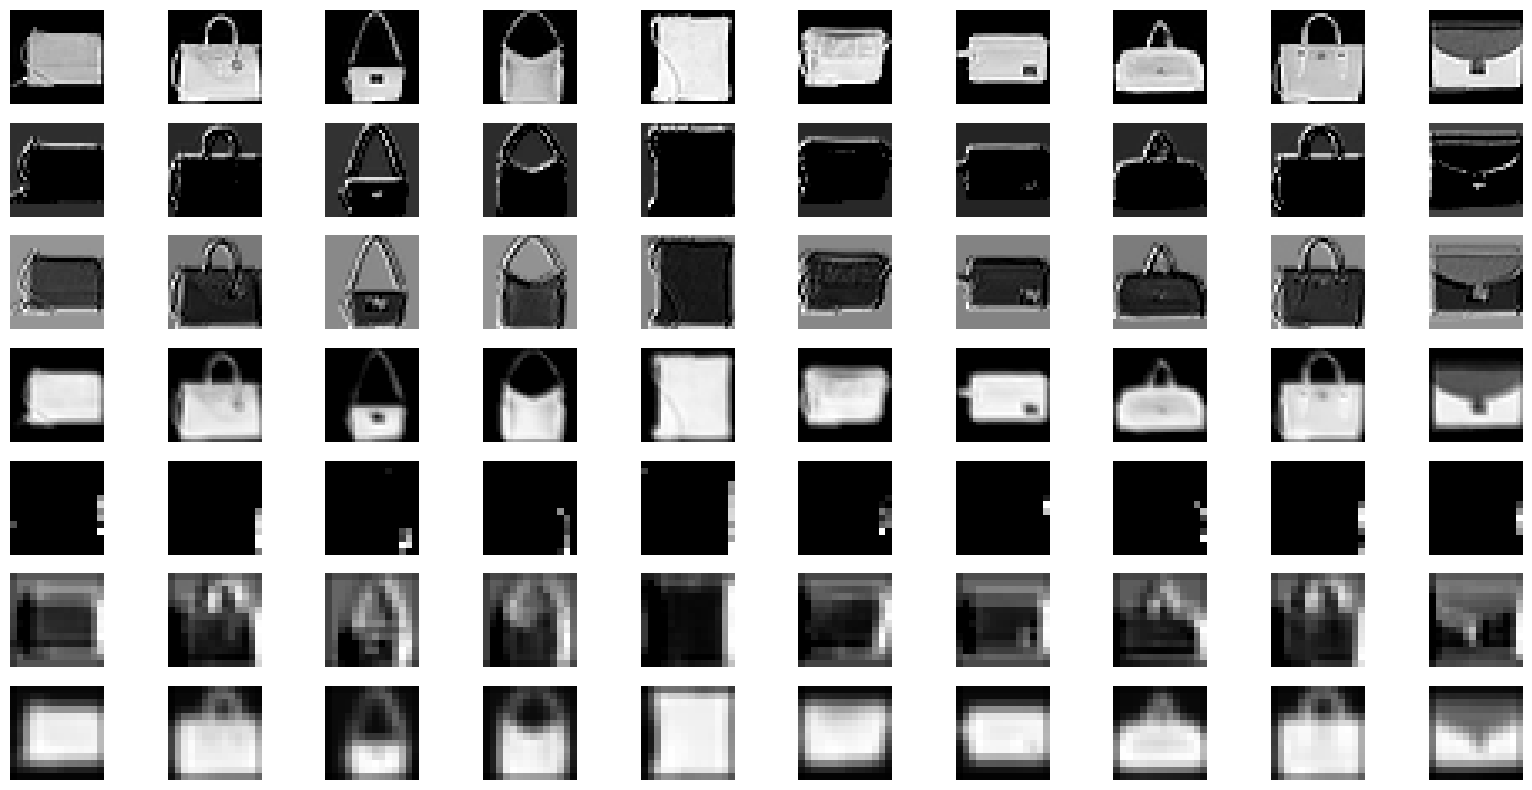

In [14]:
_, _, bag_x_test, _ = load_clothing(8)

plt.figure(figsize=(20, 10))

for i in range(10):
    plt.subplot(7, 10, i + 1)
    plt.imshow(bag_x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    output = autoencoder3.forward(bag_x_test[i].reshape(-1, 1, 28, 28))

    plt.subplot(7, 10, i + 11)
    plt.imshow(autoencoder3.layers[0].outputs[0][1], cmap='gray')
    plt.axis('off')

    plt.subplot(7, 10, i + 21)
    plt.imshow(autoencoder3.layers[0].outputs[0][2], cmap='gray')
    plt.axis('off')

    plt.subplot(7, 10, i + 31)
    plt.imshow(autoencoder3.layers[0].outputs[0][3], cmap='gray')
    plt.axis('off')
    
    plt.subplot(7, 10, i + 41)
    plt.imshow(autoencoder3.layers[2].outputs[0][1], cmap='gray')
    plt.axis('off')

    plt.subplot(7, 10, i + 51)
    plt.imshow(autoencoder3.layers[2].outputs[0][2], cmap='gray')
    plt.axis('off')

    plt.subplot(7, 10, i + 61)
    plt.imshow(autoencoder3.layers[2].outputs[0][3], cmap='gray')
    plt.axis('off')

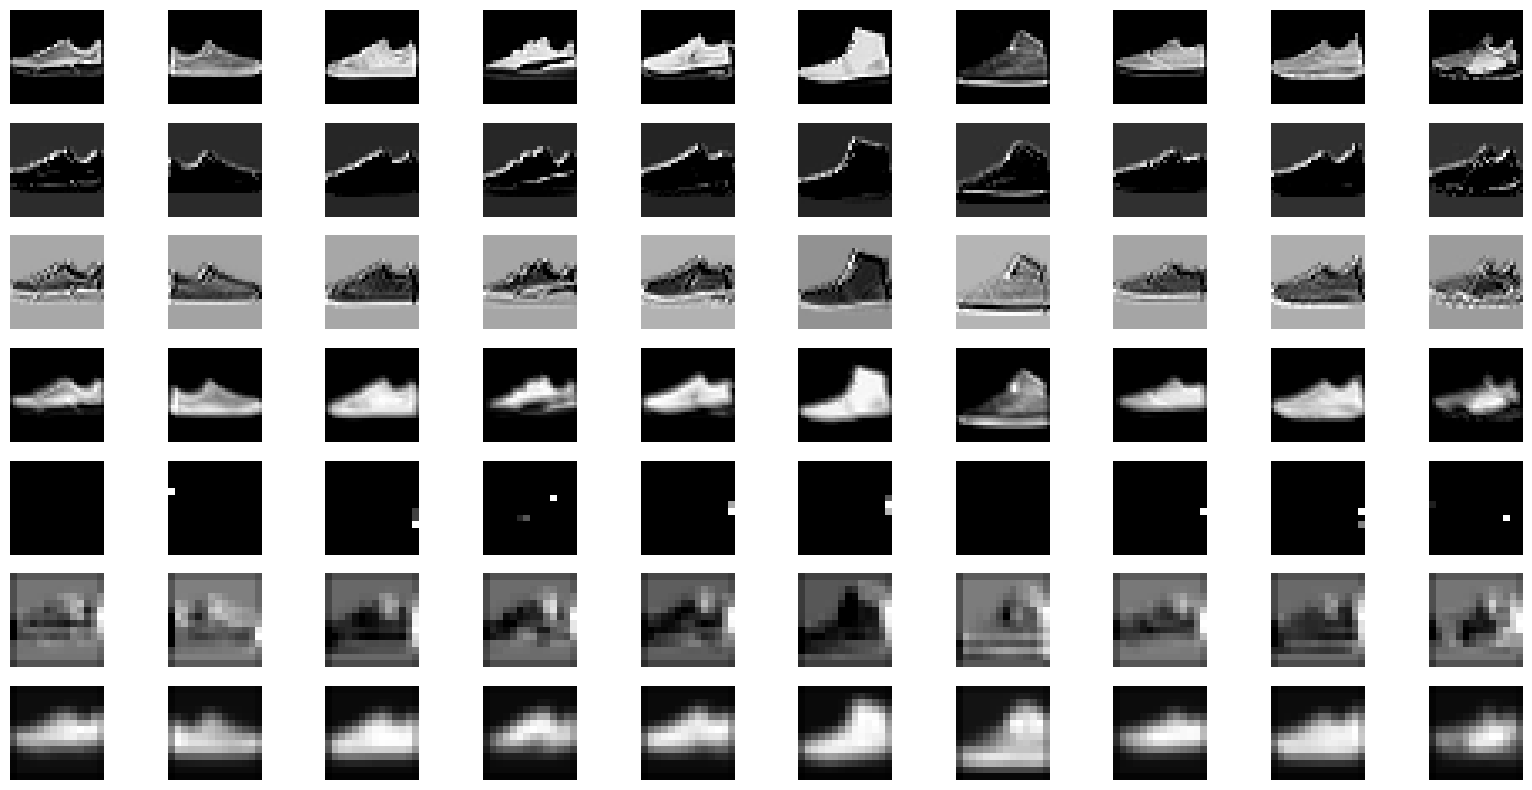

In [15]:
_, _, sneaker_x_test, _ = load_clothing(7)

plt.figure(figsize=(20, 10))

for i in range(10):
    plt.subplot(7, 10, i + 1)
    plt.imshow(sneaker_x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    output = autoencoder3.forward(sneaker_x_test[i].reshape(-1, 1, 28, 28))

    plt.subplot(7, 10, i + 11)
    plt.imshow(autoencoder3.layers[0].outputs[0][1], cmap='gray')
    plt.axis('off')

    plt.subplot(7, 10, i + 21)
    plt.imshow(autoencoder3.layers[0].outputs[0][2], cmap='gray')
    plt.axis('off')

    plt.subplot(7, 10, i + 31)
    plt.imshow(autoencoder3.layers[0].outputs[0][3], cmap='gray')
    plt.axis('off')
    
    plt.subplot(7, 10, i + 41)
    plt.imshow(autoencoder3.layers[2].outputs[0][1], cmap='gray')
    plt.axis('off')

    plt.subplot(7, 10, i + 51)
    plt.imshow(autoencoder3.layers[2].outputs[0][2], cmap='gray')
    plt.axis('off')

    plt.subplot(7, 10, i + 61)
    plt.imshow(autoencoder3.layers[2].outputs[0][3], cmap='gray')
    plt.axis('off')

In [16]:
autoencoder3.forward(x_train_c[:3000])
encoded = autoencoder3.layers[5].inputs
print(encoded.shape)

(3000, 784)


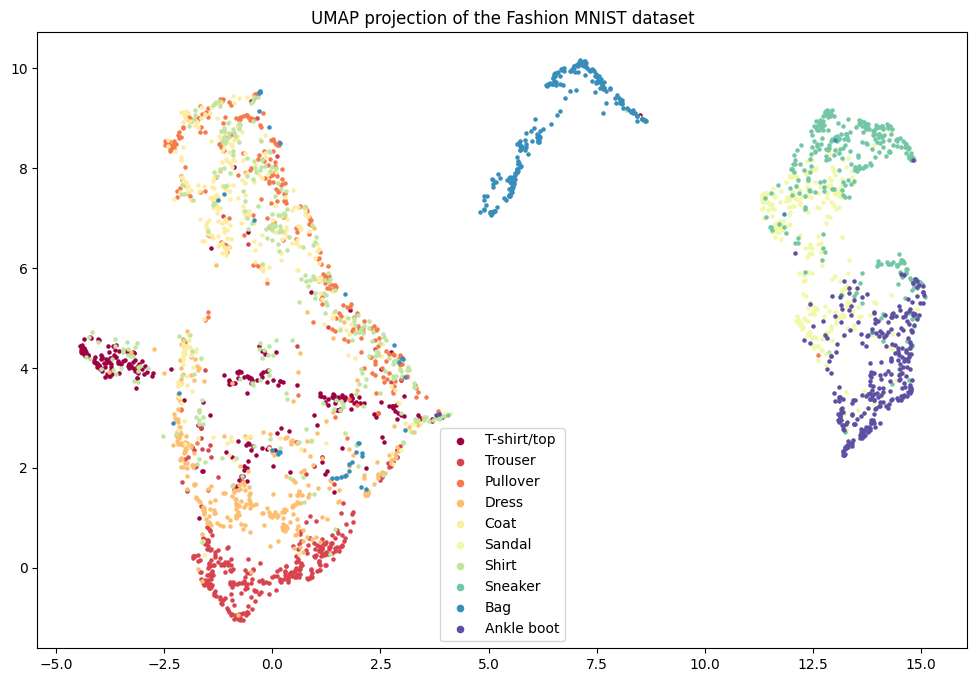

In [17]:
reducer = umap.UMAP()
umap_embeddings = reducer.fit_transform(encoded)

plt.figure(figsize=(12, 8))
unique_labels = np.unique(y_train[:3000])
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for i, label in enumerate(unique_labels):
    indices = np.where(y_train[:3000] == label)
    plt.scatter(umap_embeddings[indices, 0], umap_embeddings[indices, 1], color=colors[i],
                label=FASHION_MNIST_LABELS[label], s=5)

plt.legend(markerscale=2)
plt.title('UMAP projection of the Fashion MNIST dataset')
plt.show()

In [19]:
autoencoder3.forward(x_test_c[:3000])
encoded_test = autoencoder3.layers[5].inputs
print(encoded.shape)

(3000, 784)


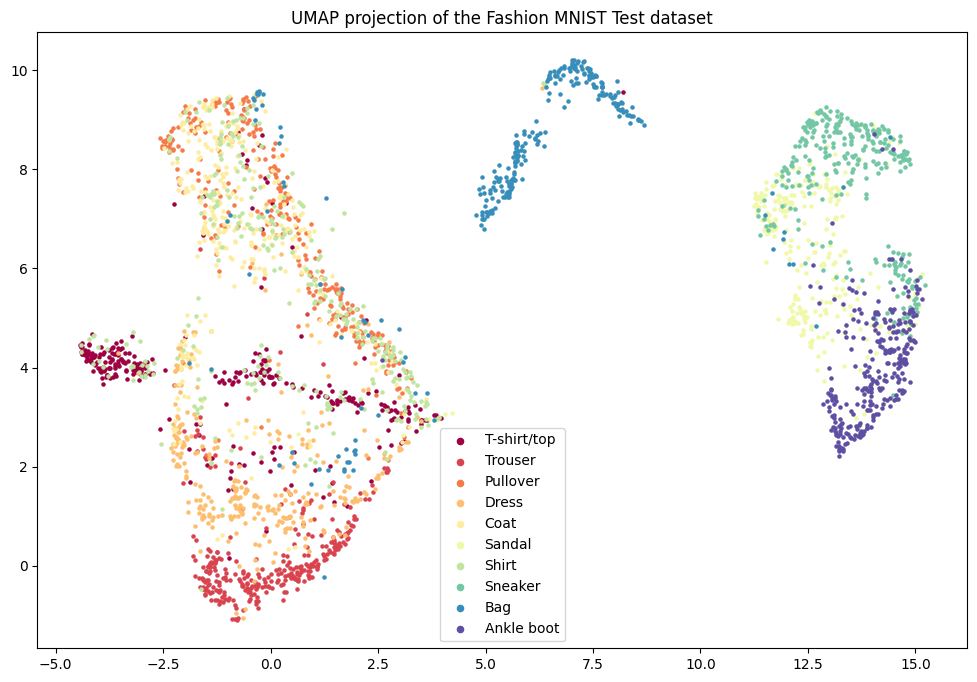

In [20]:
umap_embeddings_test = reducer.transform(encoded_test)

plt.figure(figsize=(12, 8))
unique_labels_test = np.unique(y_test[:3000])  # Assuming y_test are your test labels
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels_test)))

for i, label in enumerate(unique_labels_test):
    indices = np.where(y_test[:3000] == label)
    plt.scatter(umap_embeddings_test[indices, 0], umap_embeddings_test[indices, 1],
                color=colors[i], label=FASHION_MNIST_LABELS[label], s=5)

plt.legend(markerscale=2)
plt.title('UMAP projection of the Fashion MNIST Test dataset')
plt.show()

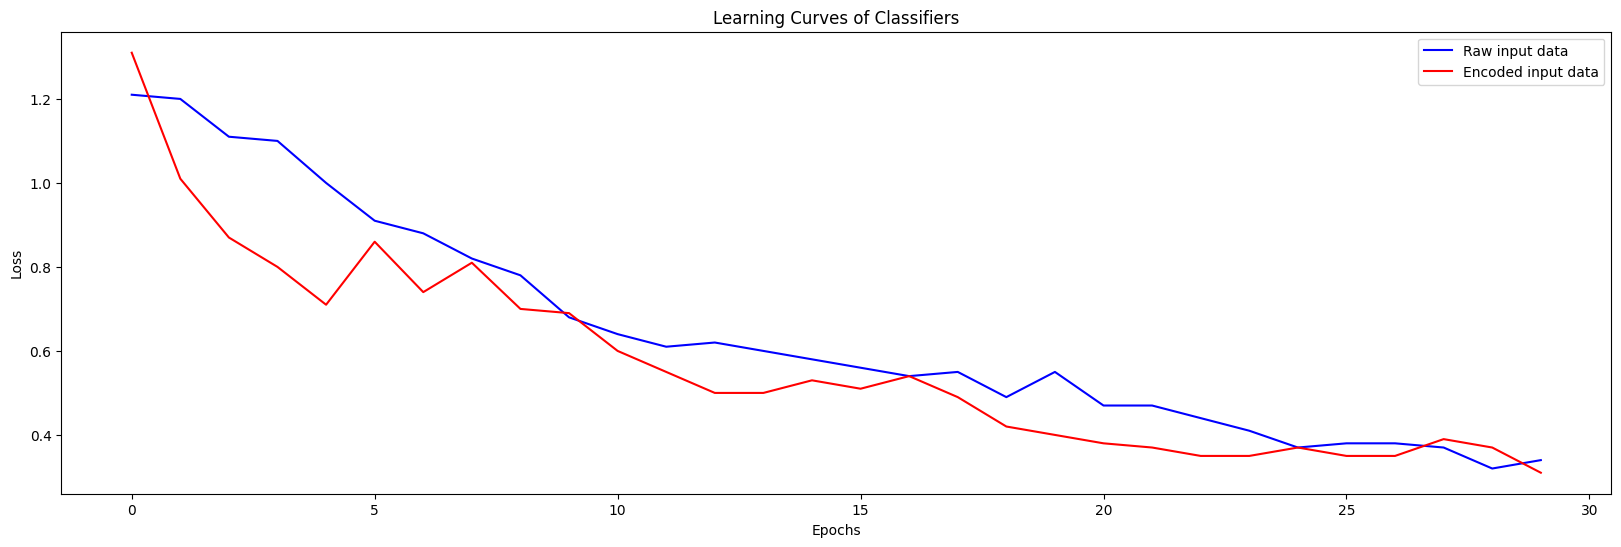

In [25]:
classifier = load_model('classifier.pkl')
classifier_from_encoded = load_model('classifier_from_encoded.pkl')


losses1 = classifier.losses
losses2 = classifier_from_encoded.losses

plt.figure(figsize=(20, 6))

plt.plot(losses1, label='Raw input data', color='blue')
plt.plot(losses2, label='Encoded input data', color='red')
plt.title('Learning Curves of Classifiers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()